<a href="https://colab.research.google.com/github/brianoscanlain/CityMatching_DataScience/blob/master/Brief_Overview_of_Cavan_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pydrive
!pip install plotly
!pip install geopandas
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
#import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 901kB 5.0MB/s 
     |████████████████████████████████| 17.9MB 12.4MB/s 
     |████████████████████████████████| 11.2MB 33.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


https://drive.google.com/open?id=1EwQ97ZbGHZKJdPi45Wjkm02opyWKxyhM

In [0]:
module = drive.CreateFile({'id':'1EwQ97ZbGHZKJdPi45Wjkm02opyWKxyhM'})
module.GetContentFile('abodoo_DB_cityMatched.xlsx')
DF = pd.read_excel('abodoo_DB_cityMatched.xlsx')


Let's find users from Cavan:

In [10]:
counties = cavan_users = [x if type(x) is str else '' for x in DF['COUNTY']]
cavan_users = [i for i,x in enumerate(counties) if 'cavan' in x.lower()]
print('{} users found from Co. Cavan, from a total of {} users in the database'.format(len(cavan_users),len(counties)))

Lat = list(DF['CityLatitude'][cavan_users])
Lon = list(DF['Citylongitude'][cavan_users])
Ind =  DF['INDUSTRY'][cavan_users]

86 users found from Co. Cavan, from a total of 19721 users in the database


Let's download County map borders from #http://airo.maynoothuniversity.ie/datastore and  let's attempt to plot the Locations of Users in Cavan:

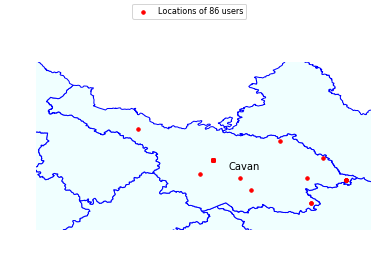

In [11]:
module = drive.CreateFile({'id':'1JtIOn-MzQC1tQ4kHuoGV0mQKTCqSTAQq'})
module.GetContentFile('Counties__OSi_National_Statutory_Boundaries__Generalised_20m.geojson')

borders = gpd.read_file('Counties__OSi_National_Statutory_Boundaries__Generalised_20m.geojson')
#OBJECTID,FCsubtype,geometry

fig, ax = plt.subplots(1)
borders.plot(color='azure', edgecolor='blue', ax=ax)
ax.scatter(Lon,Lat,12,c='r',label='Locations of {} users'.format(len(cavan_users)))
ax.axis('off')
ax.text(-7.23,
        53.95,
        'Cavan',
        horizontalalignment='center',
        fontsize=10)
ax.set_xlim(-8.1, -6.7)
ax.set_ylim(53.7, 54.4)
fig.legend(fontsize=8,loc='upper center')
#plt.savefig('UserMapLocations.png')
fig.show()

Let's have a look at the Industries which the Cavan users have listed:

In [12]:
Industries = []
for ind in Ind:
    try:
        buff = ind.split('|')
        if len(buff):
            for b in buff:
                Industries.append(b)
    except:
        continue
Industries = pd.Series(Industries)
print('{} Cavan users have a total of {} industry affiliations, {} of them unique'.format(\
len(cavan_users),len(Industries),len(Industries.unique())))

print('{} Cavan users have a total of {} industry affiliations, {} of them unique'.format(len(cavan_users),len(Industries),len(Industries.unique())))


86 Cavan users have a total of 150 industry affiliations, 26 of them unique
86 Cavan users have a total of 150 industry affiliations, 26 of them unique


Let's plot a frequency plot:

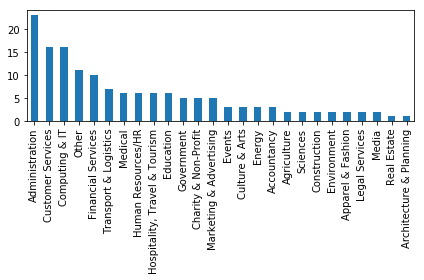

In [13]:
fig, ax = plt.subplots()
Industries.value_counts().plot(ax=ax, kind='bar')
plt.tight_layout()
plt.savefig('UserIndustryAffiliations.png')
fig.show()

